# Iris data classification using neutal network

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
import os
files = os.listdir(os.curdir)        
print(files)                               #looking inside the current directory

['.DS_Store', '.ipynb_checkpoints', 'bezdekIris.txt', 'iris-classification.ipynb', 'Iris-data.ipynb', 'iris.txt', 'irisdata-classification-nn.ipynb']


# reading data

In [5]:
df=pd.read_csv('iris.txt',header=None)
df.columns=['sepal$length','sepal$width','petal$length','petal$width','type'] # Renaming the heading

In [6]:
df.head() #view data frame

,sepal$length,sepal$width,petal$length,petal$width,type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Next we want to look into dataframe. Specifically to see how many different types are there before
we proceed with classification

In [7]:
# This function gives your differnt types within an array
def types(array):   
    newarray=[]
    for a in range(len(array)):
        if array[a] not in newarray:
            newarray.append(array[a])
    return newarray

In [31]:
types(np.asarray(df)[:,4]) # so we see that there are three different type 

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

Somtimes when the dataset is very large, this is easy way to determine differnt classes.

# Plotting the data

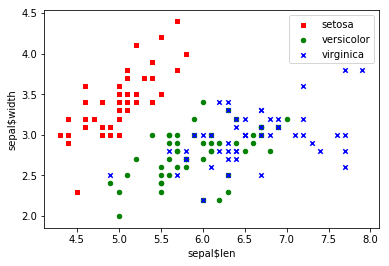

In [45]:
d1 = df[df.type=='Iris-setosa']
d2=df[df.type=='Iris-versicolor']
d3=df[df.type=='Iris-virginica']

ax1=d1.plot.scatter(x="sepal$length", y="sepal$width", marker="s",color="r",label='setosa')
ax2=d2.plot.scatter(x="sepal$length", y="sepal$width", marker="o",color="g",label='versicolor',ax=ax1)
d3.plot.scatter(x="sepal$length", y="sepal$width", marker="x",color="b",label='virginica',ax=ax1)

plt.xlabel('sepal$len')
plt.ylabel('sepal$width')
plt.legend(loc='upper right')

plt.show()

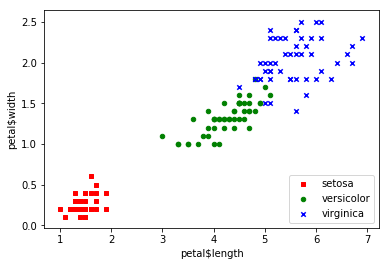

In [48]:
d1 = df[df.type=='Iris-setosa']
d2=df[df.type=='Iris-versicolor']
d3=df[df.type=='Iris-virginica']

ax1=d1.plot.scatter(x="petal$length", y="petal$width", marker="s",color="r",label='setosa')
ax2=d2.plot.scatter(x="petal$length", y="petal$width", marker="o",color="g",label='versicolor',ax=ax1)
d3.plot.scatter(x="petal$length", y="petal$width", marker="x",color="b",label='virginica',ax=ax1)

plt.xlabel('petal$length')
plt.ylabel('petal$width')
plt.legend(loc='lower right')

plt.show()

If we are interested in classifying 'setosa' from others then a simple linear regression type analysis is sufficient.
Let's do that first and then we will apply neural network to classify all there of them

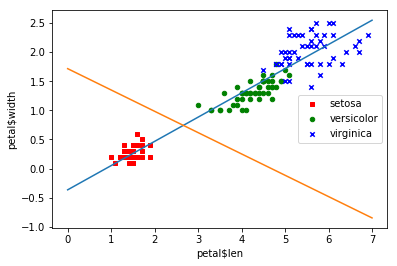

In [49]:
ax1=d1.plot.scatter(x="petal$length", y="petal$width", marker="s",color="r",label='setosa')
ax2=d2.plot.scatter(x="petal$length", y="petal$width", marker="o",color="g",label='versicolor',ax=ax1)
d3.plot.scatter(x="petal$length", y="petal$width", marker="x",color="b",label='virginica',ax=ax1)

dfarray=np.asarray(df)
from pylab import *
x=[]
for a in dfarray[:,2]:
    x.append(a)
y=[]
for a in dfarray[:,3]:
    y.append(a)
(a,b)=polyfit(x,y,1)
x=range(8)
plt.plot(x,a*x+b)
plt.plot(x,0.8-2.5*b+x*b)# this is my decision boundary line
plt.xlabel('petal$len')
plt.ylabel('petal$width')
plt.legend(loc='center right')
plt.show()

In [50]:
#This returns true if the given feature fall under iris-ssetosa, else returns false
def is_setosa(sepal_len,sepal_wid,petal_len,petal_wid): 
    if petal_wid<0.8-2.5*b+petal_len*b:
        return True
    else:
        return False

In [51]:
is_setosa(dfarray[25,0],dfarray[25,1],dfarray[25,2],dfarray[25,3])

True

Comment: We have used all our data to develop the model but ideally you would want to use about 80%
    to develop the model and rest as test set. Next, I will use neural network to classfy the different species.

# Neural Network

In [52]:
#mean normalization of the features
df1=df[df.columns[0:4]]
df2=df1.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))

In [53]:
df['y1']=np.zeros(len(df))
df['y2']=np.zeros(len(df))

df['y1']=np.where(df.type=="Iris-setosa",1,np.where(df.type=='Iris-versicolor',0,1))
df['y2']=np.where(df.type=="Iris-setosa",0,np.where(df.type=='Iris-versicolor',1,1))


in the above box,I added columns y1 and y2 to the dataframe. The purpose 
is to vectorize the differenet classes. (1,0)=iris-setosa, (0,1)=iris-versicolor 
and (1,1)=iris-virginica

In [55]:
df.head()

,sepal$length,sepal$width,petal$length,petal$width,type,y1,y2
0,5.1,3.5,1.4,0.2,Iris-setosa,1,0
1,4.9,3.0,1.4,0.2,Iris-setosa,1,0
2,4.7,3.2,1.3,0.2,Iris-setosa,1,0
3,4.6,3.1,1.5,0.2,Iris-setosa,1,0
4,5.0,3.6,1.4,0.2,Iris-setosa,1,0


In [58]:
#sigmoid function
def sigmoid(x,deriv=False):
    if (deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

#weight functions
weight0=2*np.random.random((4,6))-1
weight1=2*np.random.random((6,2))-1

In [59]:
y=np.asmatrix(pd.DataFrame.as_matrix(df[df.columns[5:7]]))  #150 time 3
l0=pd.DataFrame.as_matrix(df[df.columns[0:4]])
for j in range(60000):
    l0=pd.DataFrame.as_matrix(df2)  #150 times 4
    l1=sigmoid(np.dot(l0,weight0))                  #150 times 4 dot 4 times 6 = 150 times 6
    l2=sigmoid(np.dot(l1,weight1))                  #150 times 6 dot 6 times 3 = 150 times 3

    l2_error=y-l2                                   #150 times 3

    if (j%10000)==0:
        print('Error:'+str(np.mean(np.abs(l2_error))))

    l2_delta=np.multiply(l2_error,sigmoid(l2,deriv=True))  #150 times 3

    l1_error=l2_delta.dot(weight1.T)                       #150 times 3 dot 3 times 6= 150 times 6

    l1_delta=np.multiply(l1_error,sigmoid(l1,deriv=True))  # 150 times times 6

    weight1 += l1.T.dot(l2_delta)                          #6 times 150 dot 150 times 3= 6 times 3
    weight0 +=l0.T.dot(l1_delta)     

Error:0.442672989463
Error:0.166886028711
Error:0.166834270004
Error:0.166879363528
Error:0.00654827258333
Error:0.00539980970184


Comment: As mentioned earlier, I have again used all my data but ideally you want to use
    about 80 percent and use the rest for cross validation and testing the model. 